# Modelación Riesgo y Retornos esperados



## Descarga de datos

In [ ]:
!pip install pandas numpy matplotlib PyPortfolioOpt
import os
if not os.path.isdir('data'):
    os.system('git clone https://github.com/robertmartin8/PyPortfolioOpt.git')
    os.chdir('PyPortfolioOpt/cookbook')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 4.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pypfopt
from pypfopt import risk_models, expected_returns, plotting
import yfinance as yf
import warnings
import seaborn as sns
pypfopt.__version__

'1.5.5'

In [ ]:
def getMultiAssetData(ticketList, start_date, end_date,interval='1wk'):
    def getData(ticker):
        data = yf.download(ticker, start_date, end_date,interval=interval)
        return data
    datas = map(getData, ticketList) #Aplicar la función GetData al array "TicketList"
    return pd.concat(datas, keys=ticketList, names=['Ticker', 'Date'])

warnings.simplefilter('ignore', FutureWarning)
warnings.filterwarnings('ignore')

In [ ]:
Lista = ['SPY' ,'AGG' ,'ILF','DBC','IJH','VO','SCHM','IWM','VBR','SCHA','VTV','IVW','VGK','AIA','EWJ','VWO','EWZ','EWW','ECH','GLD','USO','COPA.L','USMV','MTUM','SIZE','XLK','XLE','XLF']
inicio = '2018-11-06'
final = '2023-11-06'
data=getMultiAssetData(ticketList=Lista, start_date=inicio, end_date=final)

df = data.copy()
closePrice = df[['Close']]
closePrice = closePrice.reset_index()
closePrice = closePrice.pivot(index='Date', columns='Ticker', values='Close')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
closePrice.describe()

Ticker,AGG,AIA,COPA.L,DBC,ECH,EWJ,EWW,EWZ,GLD,IJH,...,USMV,USO,VBR,VGK,VO,VTV,VWO,XLE,XLF,XLK
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,...,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,109.867976,68.292489,31.108589,18.665830,30.628506,59.213029,45.363734,34.695104,159.353776,225.106929,...,67.707012,65.017634,145.795195,57.580934,196.676285,124.219689,44.008900,60.290539,31.179564,118.789129
std,7.035956,12.504656,6.223148,4.929274,6.389414,6.322071,7.467003,6.238878,19.861624,37.693046,...,6.957470,24.122620,24.558527,6.727888,32.773728,16.835108,5.333454,16.961543,5.298189,31.745222
min,93.769997,45.900002,19.950001,10.700000,19.000000,45.110001,25.600000,21.790001,114.480003,126.269997,...,48.349998,18.860001,78.300003,37.540001,115.900002,80.050003,31.120001,25.860001,18.910000,59.200001
25%,104.070000,59.080002,25.075001,15.120000,26.139999,54.549999,42.380001,29.750000,143.750000,191.300003,...,62.990002,44.439999,128.210007,52.860001,167.279999,108.519997,40.400002,48.680000,26.860001,87.760002
50%,112.489998,63.599998,31.090000,16.730000,28.400000,57.750000,45.580002,33.369999,166.350006,230.690002,...,67.779999,67.019997,150.759995,56.480000,203.250000,124.470001,42.529999,59.830002,30.990000,127.410004
75%,115.410004,77.110001,37.049999,23.180000,33.869999,64.809998,49.270000,40.270000,173.460007,260.209991,...,73.379997,87.519997,168.910004,62.639999,221.949997,140.179993,49.040001,73.080002,35.660000,143.460007
max,119.559998,102.059998,43.389999,30.230000,47.310001,73.430000,62.919998,47.990002,190.809998,289.769989,...,80.900002,106.559998,185.619995,70.379997,258.940002,149.809998,56.189999,93.129997,41.169998,174.880005


<Axes: xlabel='Date'>

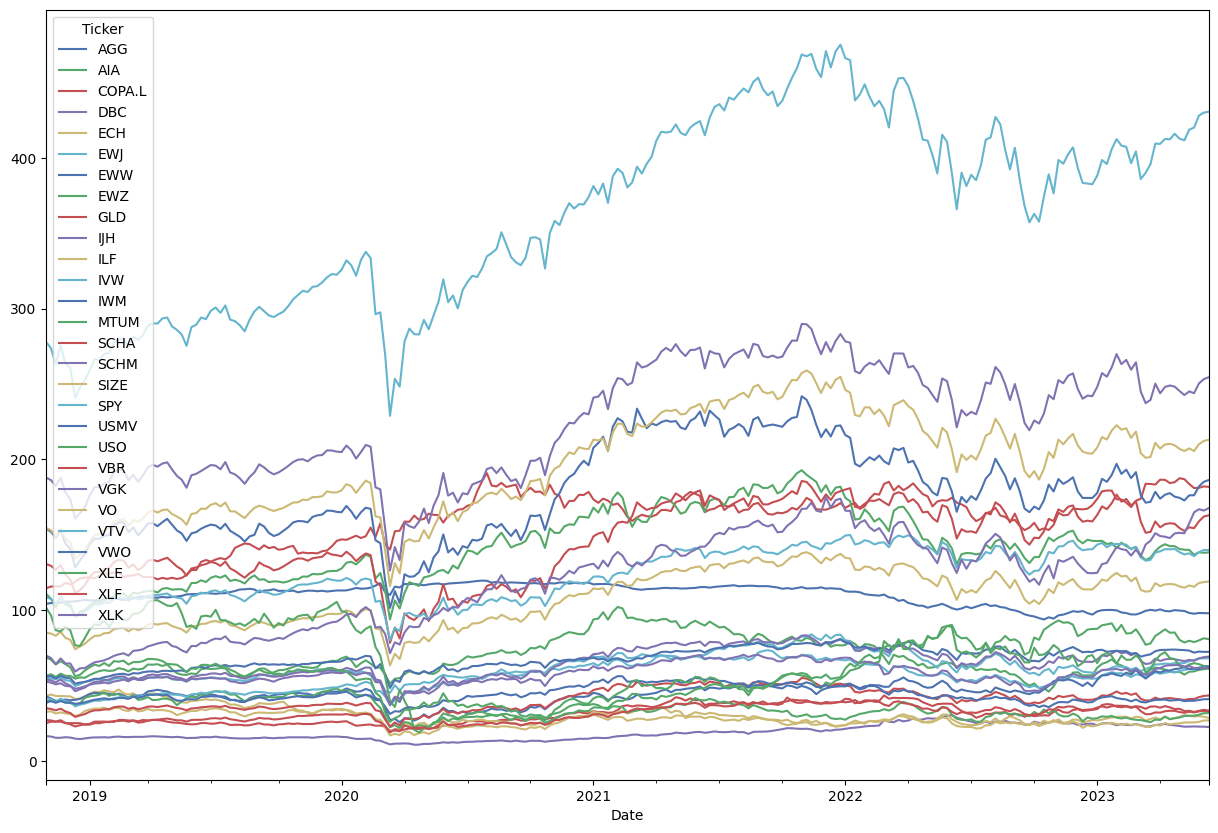

In [ ]:
closePrice.plot(figsize=(15,10))

<Axes: xlabel='Date'>

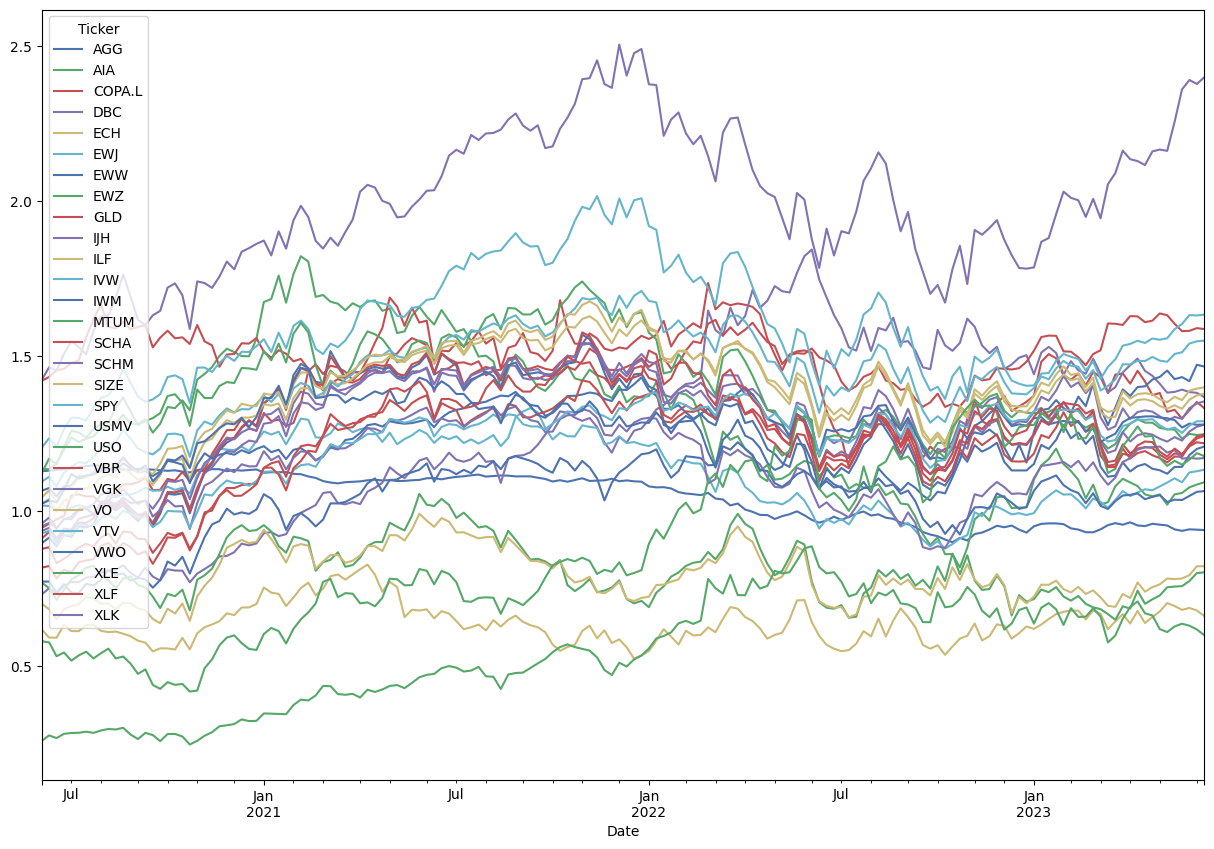

In [ ]:
Price_base100=Price_base100[Price_base100.index>"2020-06-01"]
Price_base100=closePrice/closePrice.iloc[0]
Price_base100.plot(figsize=(15,10))

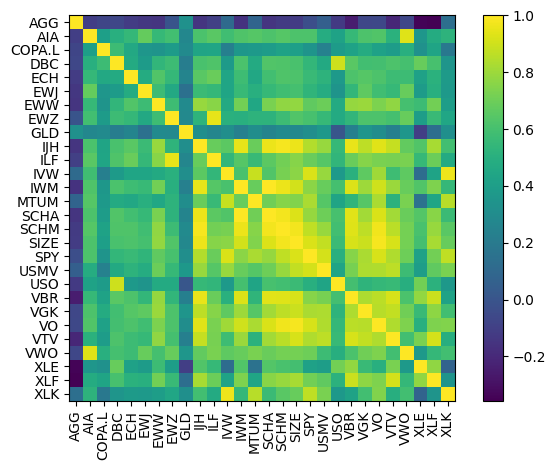

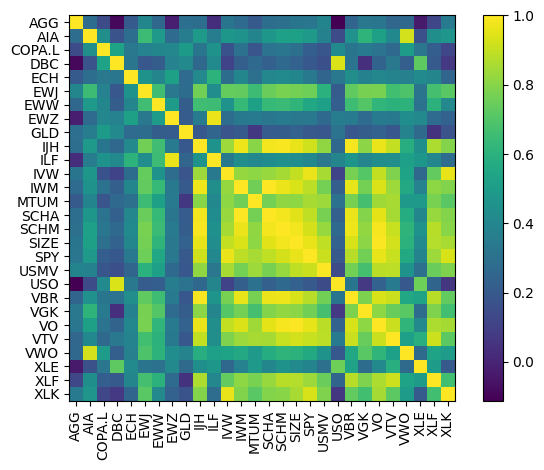

In [ ]:
closePrice=closePrice[closePrice.index>"2020-06-01"]
df=closePrice.copy()
#df = pd.read_csv("data/stock_prices.csv", parse_dates=True, index_col="date")
past_df, future_df = df.iloc[:-90], df.iloc[-90:]
future_cov = risk_models.sample_cov(future_df, frecuency=52)
sample_cov = risk_models.sample_cov(past_df, frecuency=52)

plotting.plot_covariance(sample_cov, plot_correlation=True)
plotting.plot_covariance(future_cov, plot_correlation=True)
plt.show()

Correlación activos en el portafolio


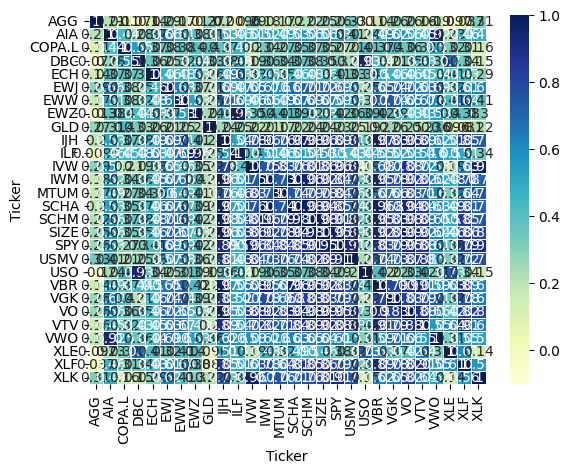

In [ ]:
fig1 = plt.figure()

correlation_matrix = risk_models.returns_from_prices(df).corr(method='pearson')
sns.heatmap(correlation_matrix,xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
cmap='YlGnBu', annot=True, linewidth=0.5)
print('Correlación activos en el portafolio')
plt.show(fig1)

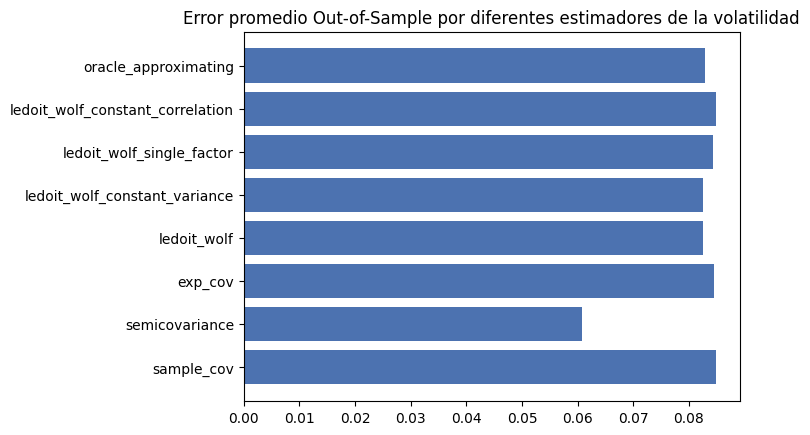

In [ ]:
future_variance = np.diag(future_cov)
mean_abs_errors = []

risk_methods = [
    "sample_cov",
    "semicovariance",
    "exp_cov",
    "ledoit_wolf",
    "ledoit_wolf_constant_variance",
    "ledoit_wolf_single_factor",
    "ledoit_wolf_constant_correlation",
    "oracle_approximating",
]

for method in risk_methods:
    S = risk_models.risk_matrix(past_df, method=method)
    Sf=risk_models.risk_matrix(future_df, method=method)
    variance = np.diag(S)
    variancef=np.diag(Sf)
    mean_abs_errors.append(np.sum(np.abs(variance - variancef)) / len(variance))

xrange = range(len(mean_abs_errors))
plt.barh(xrange, mean_abs_errors)
plt.yticks(xrange, risk_methods)
plt.title("Error promedio Out-of-Sample por diferentes estimadores de la volatilidad")
plt.show()

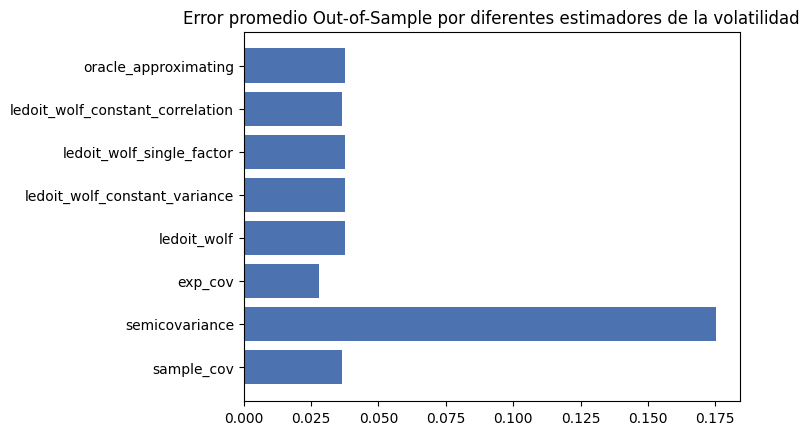

In [ ]:
future_variance = np.diag(future_cov)
mean_abs_errors = []

risk_methods = [
    "sample_cov",
    "semicovariance",
    "exp_cov",
    "ledoit_wolf",
    "ledoit_wolf_constant_variance",
    "ledoit_wolf_single_factor",
    "ledoit_wolf_constant_correlation",
    "oracle_approximating",
]

for method in risk_methods:
    S = risk_models.risk_matrix(df, method=method)
    variance = np.diag(S)
    mean_abs_errors.append(np.sum(np.abs(variance - future_variance)) / len(variance))

xrange = range(len(mean_abs_errors))
plt.barh(xrange, mean_abs_errors)
plt.yticks(xrange, risk_methods)
plt.title("Error promedio Out-of-Sample por diferentes estimadores de la volatilidad")
plt.show()

# Estimación retornos esperados



### Modelo CAPM

In [ ]:
def capm_return(
    prices,
    market_prices=None,
    returns_data=False,
    risk_free_rate=0.02,
    compounding=True,
    frequency=252,
    log_returns=False,
    ):
    if not isinstance(prices, pd.DataFrame):
        warnings.warn("Precios tiene que ser un DataFrame", RuntimeWarning)
        prices = pd.DataFrame(prices)

    market_returns = None

    if returns_data:
        returns = prices.copy()
        if market_prices is not None:
            market_returns = market_prices
    else:
        returns = returns_from_prices(prices, log_returns)

        if market_prices is not None:
            if not isinstance(market_prices, pd.DataFrame):
                warnings.warn("Precios tiene que ser un DataFrame", RuntimeWarning)
                market_prices = pd.DataFrame(market_prices)

            market_returns = returns_from_prices(market_prices, log_returns)
    # Usar un portafolio EW como proxy del mercado
    if market_returns is None:
        # Juntar retorono mercado con retorno de los activos
        returns["mkt"] = returns.mean(axis=1)
    else:
        market_returns.columns = ["mkt"]
        returns = returns.join(market_returns, how="left")

    _check_returns(returns)

    # Calcular matriz de covarianzas incluyendo el bechmarck
    cov = returns.cov()
    # La ultima columna a la derecha es el benchmarck(Mercado)
    betas = cov["mkt"] / cov.loc["mkt", "mkt"]
    betas = betas.drop("mkt")
    # Encontrar el retorno promedio del mercado
    if compounding:
        mkt_mean_ret = (1 + returns["mkt"]).prod() ** (
            frequency / returns["mkt"].count()
        ) - 1
    else:
        mkt_mean_ret = returns["mkt"].mean() * frequency

    # CAPM formula
    return risk_free_rate + betas * (mkt_mean_ret - risk_free_rate)

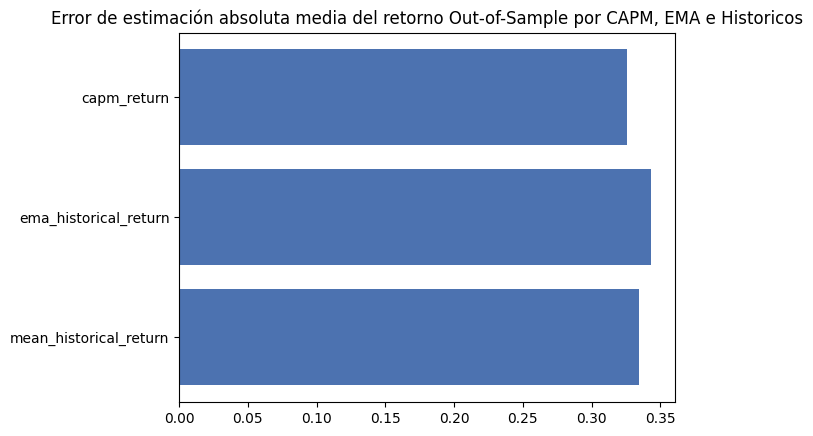

In [ ]:
future_rets = expected_returns.mean_historical_return(future_df, frequency=52)
mean_abs_errors = []
return_methods = [
    "mean_historical_return",
    "ema_historical_return",
    "capm_return",
    ]

for method in return_methods:
    mu = expected_returns.return_model(past_df, method=method, frequency=52)
    mean_abs_errors.append(np.sum(np.abs(mu - future_rets)) / len(mu))

xrange = range(len(mean_abs_errors))
plt.barh(xrange, mean_abs_errors)
plt.yticks(xrange, return_methods)
plt.title("Error de estimación absoluta media del retorno Out-of-Sample por CAPM, EMA e Historicos")
plt.show()

In [ ]:
print(mean_abs_errors)

[0.33466036981003133, 0.3435409472941156, 0.32593395291148003]


# Optimización (Media-Varianza)


## Calcular matriz de covarianza

In [ ]:
S = risk_models.risk_matrix(df, method='semicovariance')

## Estimación retoronos CAPM


In [ ]:
from pypfopt import expected_returns

mu = expected_returns.capm_return(df, frequency=52, market_prices=df['SPY'])
mu

AGG       0.027994
AIA       0.091506
COPA.L    0.056672
DBC       0.056641
ECH       0.094032
EWJ       0.083929
EWW       0.098417
EWZ       0.100815
GLD       0.038856
IJH       0.124899
ILF       0.103744
IVW       0.136321
IWM       0.132287
MTUM      0.121325
SCHA      0.131438
SCHM      0.125719
SIZE      0.123522
SPY       0.121914
USMV      0.095319
USO       0.079705
VBR       0.121408
VGK       0.109788
VO        0.125505
VTV       0.100408
VWO       0.082748
XLE       0.097836
XLF       0.120266
XLK       0.143130
Name: mkt, dtype: float64

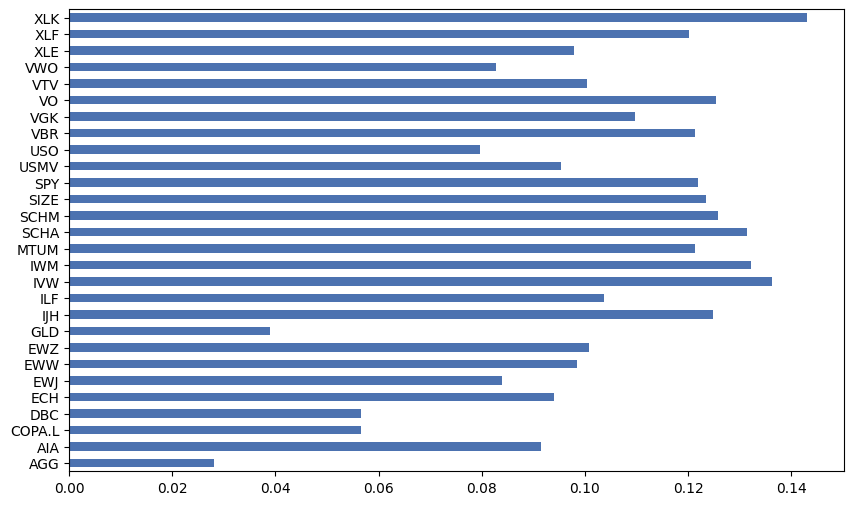

In [ ]:
mu.plot.barh(figsize=(10,6));

## Max Sharpe con restricciones

In [ ]:
sector_mapper = {
    "MSFT": "Tech",
    "AMZN": "Consumer Discretionary",
    "KO": "Consumer Staples",
    "MA": "Financial Services",
    "COST": "Consumer Staples",
    "LUV": "Aerospace",
    "XOM": "Energy",
    "PFE": "Healthcare",
    "JPM": "Financial Services",
    "UNH": "Healthcare",
    "ACN": "Misc",
    "DIS": "Media",
    "GILD": "Healthcare",
    "F": "Auto",
    "TSLA": "Auto"
}

sector_lower = {
    "Consumer Staples": 0.1, # Al menos 10% en consumo basico
    "Tech": 0.05 # Al menos 5% en tech
    # Otros sectores no tienen restricción inferior
}

sector_upper = {
    "Tech": 0.2, #Max 20% en tech
    "Aerospace":0.1, #Max 10% en Aeroespacial
    "Energy": 0.1,
    "Auto":0.15
}

In [ ]:
from pypfopt import EfficientFrontier

mu = expected_returns.capm_return(df)
S = risk_models.CovarianceShrinkage(df).ledoit_wolf()

ef = EfficientFrontier(mu, S)
#ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper) #Agregar restricciones sectoriales

amzn_index = ef.tickers.index("AMZN") #Agregar restricciones puntuales
#ef.add_constraint(lambda w: w[amzn_index] == 0.10)

tsla_index = ef.tickers.index("TSLA")
#ef.add_constraint(lambda w: w[tsla_index] <= 0.05)

ef.add_constraint(lambda w: w[10] >= 0.05)

ef.max_sharpe()
weights = ef.clean_weights()

In [ ]:
from pypfopt import EfficientFrontier

ef = EfficientFrontier(mu, S)
ef.add_constraint(lambda w: w>= 0.01)

ef.max_sharpe()
weights = ef.clean_weights()

In [ ]:
weights

OrderedDict([('AGG', 0.05),
             ('AIA', 0.0),
             ('COPA.L', 0.0),
             ('DBC', 0.52366),
             ('ECH', 0.0),
             ('EWJ', 0.0),
             ('EWW', 0.42634),
             ('EWZ', 0.0),
             ('GLD', 0.0),
             ('IJH', 0.0),
             ('ILF', 0.0),
             ('IVW', 0.0),
             ('IWM', 0.0),
             ('MTUM', 0.0),
             ('SCHA', 0.0),
             ('SCHM', 0.0),
             ('SIZE', 0.0),
             ('SPY', 0.0),
             ('USMV', 0.0),
             ('USO', 0.0),
             ('VBR', 0.0),
             ('VGK', 0.0),
             ('VO', 0.0),
             ('VTV', 0.0),
             ('VWO', 0.0),
             ('XLE', 0.0),
             ('XLF', 0.0),
             ('XLK', 0.0)])

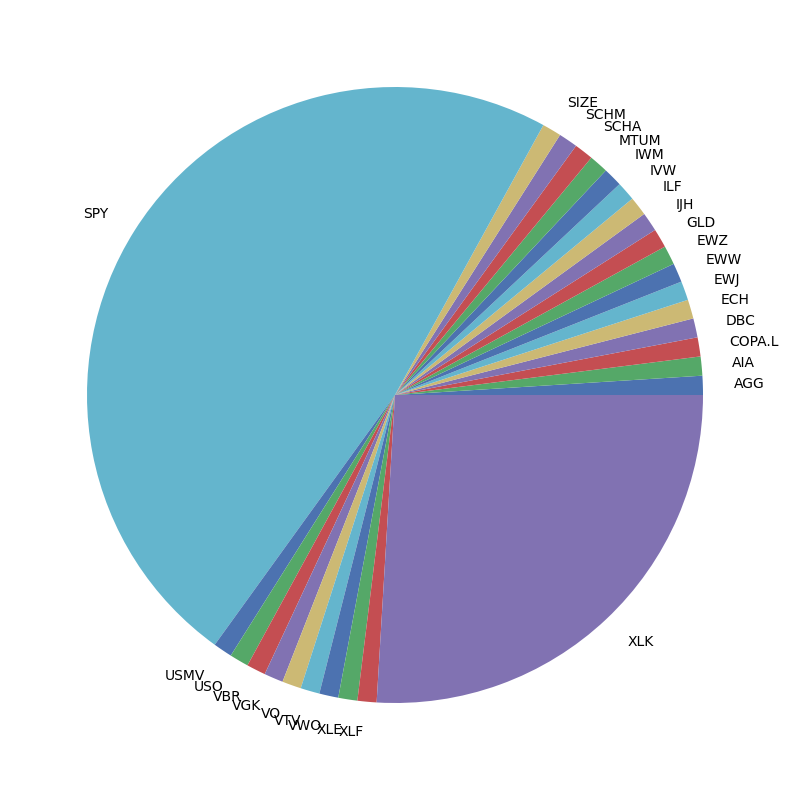

In [ ]:
pd.Series(weights).plot.pie(figsize=(10,10));

## Frontera eficiente con regularizacion L2

In [ ]:
num_small = len([k for k in weights if weights[k] <= 0.01])
print(f"{num_small}/{len(ef.tickers)} activos con peso menor a 1%")

26/28 activos con peso 0


In [ ]:
ef.portfolio_performance(verbose=True);

Expected annual return: 12.2%
Annual volatility: 26.3%
Sharpe Ratio: 0.39


In [ ]:
from pypfopt import objective_functions

ef = EfficientFrontier(mu, S)
#ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.add_objective(objective_functions.L2_reg, gamma=0.1)  # gamma es el parametro a ajustar para evitar overfitting
ef.max_sharpe()
weights = ef.clean_weights()
weights

OrderedDict([('AGG', 0.0),
             ('AIA', 0.0),
             ('COPA.L', 0.0),
             ('DBC', 0.0),
             ('ECH', 0.0),
             ('EWJ', 0.00926),
             ('EWW', 0.0),
             ('EWZ', 0.0),
             ('GLD', 0.0),
             ('IJH', 0.05423),
             ('ILF', 0.0),
             ('IVW', 0.124),
             ('IWM', 0.03109),
             ('MTUM', 0.06007),
             ('SCHA', 0.02933),
             ('SCHM', 0.04527),
             ('SIZE', 0.07931),
             ('SPY', 0.11149),
             ('USMV', 0.06164),
             ('USO', 0.0),
             ('VBR', 0.03017),
             ('VGK', 0.04273),
             ('VO', 0.06974),
             ('VTV', 0.06136),
             ('VWO', 0.0),
             ('XLE', 0.0),
             ('XLF', 0.03628),
             ('XLK', 0.15403)])

In [ ]:
num_small = len([k for k in weights if weights[k] <= 1e-4])
print(f"{num_small}/{len(ef.tickers)} activos con peso 0")

12/28 activos con peso 0


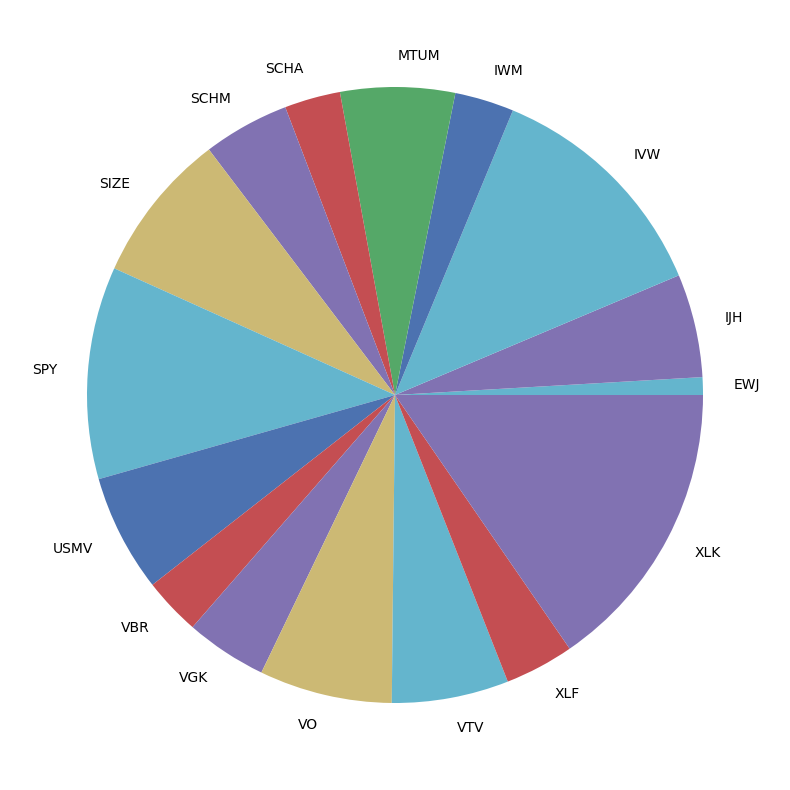

In [ ]:
pd.Series(weights).plot.pie(figsize=(10, 10));

In [ ]:
ef.portfolio_performance(verbose=True)

Expected annual return: 14.3%
Annual volatility: 32.4%
Sharpe Ratio: 0.38


(0.14302622722867486, 0.32410824544317696, 0.3795837623953444)

## Graficas



In [ ]:
from pypfopt import CLA, plotting

cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

Expected annual return: 8.2%
Annual volatility: 17.0%
Sharpe Ratio: 0.37


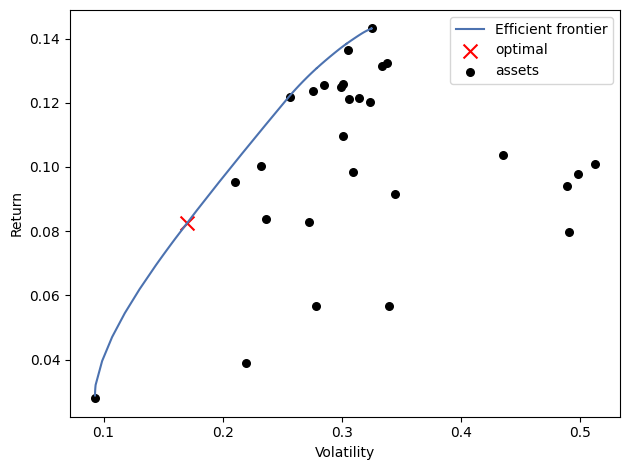

In [ ]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)

## Otras gráficas



In [ ]:
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt((w.T * (S @ w.T)).sum(axis=0))
sharpes = rets / stds

print("Retornos simulación:", rets)
print("Voaltildades simulación:", stds)

Retornos simulación: [0.09951094 0.10057356 0.10239562 ... 0.10053148 0.11223792 0.09661665]
Voaltildades simulación: 0       0.234400
1       0.276025
2       0.272017
3       0.252553
4       0.267780
          ...   
9995    0.240034
9996    0.244665
9997    0.244006
9998    0.262069
9999    0.232797
Length: 10000, dtype: float64


In [ ]:
# mus = []
# stds = []
# sharpes = []
# for _ in range(10000):
#     w = np.random.dirichlet(np.ones(len(mu)))
#     # w = np.random.rand(len(mu))
#     # w /= w.sum()
#     ret = mu.dot(w)
#     std = np.sqrt(w.dot(S @ w))
#     mus.append(ret)
#     stds.append(std)
#     sharpes.append(ret / std)

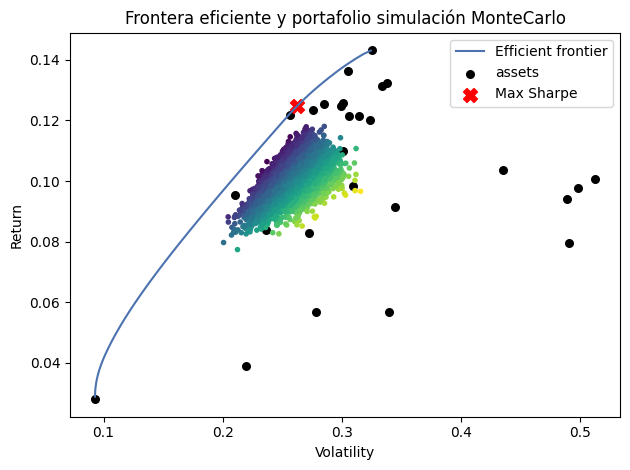

In [ ]:
# Plot efficient frontier with Monte Carlo sim
ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)

# Find and plot the tangency portfolio
ef2 = EfficientFrontier(mu, S)
ef2.max_sharpe()
ret_tangent, std_tangent, _ = ef2.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="X", s=100, c="r", label="Max Sharpe")


# Plot random portfolios
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Format
ax.set_title("Frontera eficiente y portafolio simulación MonteCarlo")
ax.legend()
plt.tight_layout()
plt.show()